
Assignment 3 Solution

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2

Image Augmentation

In [ ]:
data_path = './flowers/'
batch_size = 32
target_size = (64, 64)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.2)

In [ ]:
X_train = train_datagen.flow_from_directory(data_path,
                                            target_size=target_size,
                                            batch_size=batch_size,
                                            subset="training",
                                            class_mode='categorical')



X_test = test_datagen.flow_from_directory(data_path,
                                          target_size=target_size,
                                          batch_size=batch_size,
                                          subset="validation",
                                          class_mode='categorical')

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


Create model

In [ ]:
model = Sequential()

Add layers

In [ ]:
model.add(Convolution2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0


Compile the model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fit the model

In [ ]:
model.fit(X_train, steps_per_epoch=100, epochs=20)

Epoch 1/20
100/100 [==============================] - 227s 2s/step - loss: 1.3788 - accuracy: 0.3768
Epoch 2/20
100/100 [==============================] - 123s 1s/step - loss: 1.1511 - accuracy: 0.5134
Epoch 3/20
100/100 [==============================] - 157s 2s/step - loss: 1.1175 - accuracy: 0.5387
Epoch 4/20
100/100 [==============================] - 111s 1s/step - loss: 1.0274 - accuracy: 0.5929
Epoch 5/20
100/100 [==============================] - 43s 423ms/step - loss: 0.9907 - accuracy: 0.5929
Epoch 6/20
100/100 [==============================] - 27s 272ms/step - loss: 0.9513 - accuracy: 0.6179
Epoch 7/20
100/100 [==============================] - 25s 248ms/step - loss: 0.9438 - accuracy: 0.6355
Epoch 8/20
100/100 [==============================] - 73s 734ms/step - loss: 0.9000 - accuracy: 0.6519
Epoch 9/20
100/100 [==============================] - 66s 662ms/step - loss: 0.8545 - accuracy: 0.6702
Epoch 10/20
100/100 [==============================] - 28s 283ms/step - loss: 0.8

Save the model

In [ ]:
model.save("model.h5")

Test the model

In [ ]:
def predict():
    img = image.load_img("./rose.jpg", target_size=target_size)
    x = image.img_to_array(img)
    x = tf.expand_dims(x,0)

    labels = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    
    pred = model.predict(x)
    prediction = labels[np.argmax(pred[0])]
    
    print(f'The given image is a {prediction}')
    plt.imshow(plt.imread("./rose.jpg"))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 47ms/step
The given image is a rose


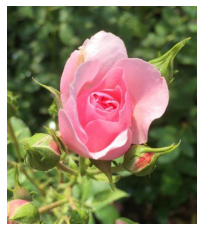

In [ ]:
predict()